# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Parte 0: Carga del Corpus

In [24]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

In [ ]:
num_documents = len(newsgroupsdocs)
print(f"El dataset newsgroupsdocs tiene {num_documents} documentos (términos).")

El dataset newsgroupsdocs tiene 18846 documentos (términos).


In [ ]:
import sys
sys.getsizeof(newsgroupsdocs)

150824

## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Construcción de la matriz de términos (TF)
vectorizador_tf = CountVectorizer()
matriz_tf = vectorizador_tf.fit_transform(newsgroupsdocs)

# Obtener el vocabulario
vocabulario = vectorizador_tf.get_feature_names_out()

# Convertir la matriz a DataFrame
tf_df = pd.DataFrame(matriz_tf.toarray(), columns=vocabulario)

# Mostrar las primeras filas
print("Matriz de términos (TF):")
print(tf_df)


Matriz de términos (TF):
       00  000  0000  00000  000000  00000000  0000000004  00000000b  \
0       0    0     0      0       0         0           0          0   
1       0    0     0      0       0         0           0          0   
2       0    0     0      0       0         0           0          0   
3       0    0     0      0       0         0           0          0   
4       0    0     0      0       0         0           0          0   
...    ..  ...   ...    ...     ...       ...         ...        ...   
18841   0    0     0      0       0         0           0          0   
18842   0    0     0      0       0         0           0          0   
18843   0    0     0      0       0         0           0          0   
18844   0    0     0      0       0         0           0          0   
18845   0    0     0      0       0         0           0          0   

       00000001  00000001b  ...  zzs  zzvsi  zzy_3w  zzz  zzzoh  zzzzzz  \
0             0          0  ...    

In [3]:
import numpy as np

# Calcular DF: número de documentos en los que aparece cada término
frecuencia_documentos = np.sum(matriz_tf.toarray() > 0, axis=0)

# Convertir a Series de Pandas para visualización
df_series = pd.Series(frecuencia_documentos, index=vocabulario)

# Mostrar las palabras más comunes según DF
print("Frecuencia de documentos (DF) - Top 10:")
print(df_series.sort_values(ascending=False).head(10))


Frecuencia de documentos (DF) - Top 10:
the     15749
to      14108
and     12991
of      12809
in      11842
is      11685
it      11029
that    10974
for     10406
have     8722
dtype: int64


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Construimos la matriz TF-IDF
vectorizador_tfidf = TfidfVectorizer()
matriz_tfidf = vectorizador_tfidf.fit_transform(newsgroupsdocs)

# Convertimos a DataFrame
vocabulario_tfidf = vectorizador_tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame(matriz_tfidf.toarray(), columns=vocabulario_tfidf)

# Mostramos algunas filas y columnas
print("Matriz TF-IDF (primeras 5 filas y 10 columnas):")
print(tfidf_df)


Matriz TF-IDF (primeras 5 filas y 10 columnas):
        00  000  0000  00000  000000  00000000  0000000004  00000000b  \
0      0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
1      0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
2      0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
3      0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
4      0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
...    ...  ...   ...    ...     ...       ...         ...        ...   
18841  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
18842  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
18843  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
18844  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
18845  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0   

       00000001  00000001b  ...  zzs  zzvsi  zzy_3w  zzz  zzzoh  zzzzzz  \


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [5]:
consulta = ["chicken"]

# Usar el mismo vectorizador TF-IDF que fue entrenado previamente
vector_consulta = vectorizador_tfidf.transform(consulta)
print("Vector de consulta TF-IDF:")
print(vector_consulta)


Vector de consulta TF-IDF:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (1, 134410)>
  Coords	Values
  (0, 36251)	1.0


In [6]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculamos la similitud coseno entre la consulta y todos los documentos
similitudes = cosine_similarity(vector_consulta, matriz_tfidf).flatten()
print("Similitudes coseno con los documentos:")
print(similitudes)
len(similitudes)

Similitudes coseno con los documentos:
[0. 0. 0. ... 0. 0. 0.]


18846

In [7]:
# Obtener los índices de los documentos ordenados por similitud descendente
indices_ordenados = np.argsort(similitudes)[::-1]
print("Índices de los documentos ordenados por similitud:")
print(indices_ordenados)
len(indices_ordenados)


Índices de los documentos ordenados por similitud:
[ 1315 13222 15919 ... 12565 12566 12557]


18846

In [8]:
top_n = 20
indices_top = indices_ordenados[:top_n]

In [9]:
# Crear el DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Índice del documento": indices_top,
    "Similitud coseno": similitudes[indices_top],
    "num_aparece_consulta_en_doc": [matriz_tf[i].sum() for i in indices_top],
    "texto_documento": [newsgroupsdocs[i] for i in indices_top]
})

# Obtener el texto del documento más similar (el primero en el DataFrame)
texto_mas_similar = resultados_df.iloc[0]["texto_documento"]

# Mostrar los resultados
print("Texto del documento más similar:")
print(texto_mas_similar)
print("\nTop documentos relevantes para la consulta:")
print(resultados_df)


Texto del documento más similar:

But remember that had God extinguished the blasphemous trash of Europe (and
Imperialism with it), the United States would not exist today to put an end
to those "games"....begs the question, which came first, the chicken or the
egg???

Top documentos relevantes para la consulta:
    Índice del documento  Similitud coseno  num_aparece_consulta_en_doc  \
0                   1315          0.269169                           40   
1                  13222          0.213187                           74   
2                  15919          0.193458                           61   
3                   9048          0.176817                           69   
4                    357          0.158946                           94   
5                  16902          0.156495                          278   
6                   5738          0.150360                          119   
7                    897          0.148718                          351   
8          

## Parte 3: Ranking con BM25

### Actividad

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [10]:
!pip install rank_bm25

In [11]:
from rank_bm25 import BM25Okapi
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

# Tokenizador simple: solo palabras en minúscula, sin signos de puntuación ni stopwords
def tokenizar(texto):
    # Quitar caracteres no alfabéticos y convertir a minúsculas
    tokens = re.findall(r'\b\w+\b', texto.lower())
    # Quitar stopwords
    tokens = [t for t in tokens if t not in ENGLISH_STOP_WORDS]
    return tokens

# Tokenizamos todos los documentos
documentos_tokenizados = [tokenizar(doc) for doc in newsgroupsdocs]


In [12]:
bm25 = BM25Okapi(documentos_tokenizados)


In [13]:
consulta = ["chicken"]
consulta_tokenizada = [tokenizar(q) for q in consulta][0]

# Calcular scores BM25 para todos los documentos
scores_bm25 = bm25.get_scores(consulta_tokenizada)


In [14]:
# Ranking BM25 (descendente)
indices_bm25 = scores_bm25.argsort()[::-1]

# Ranking TF-IDF (ya lo tienes en indices_ordenados)
indices_tfidf = indices_ordenados

# Mostrar top 10 resultados para comparación
print("Top 10 documentos según BM25:")
for i in indices_bm25[:10]:
    print(f"Doc {i} - Score BM25: {scores_bm25[i]:.4f}")

print("\nTop 10 documentos según TF-IDF:")
for i in indices_tfidf[:10]:
    print(f"Doc {i} - Similaridad TF-IDF: {similitudes[i]:.4f}")


Top 10 documentos según BM25:
Doc 1315 - Score BM25: 11.0711
Doc 15919 - Score BM25: 10.6657
Doc 13222 - Score BM25: 10.4116
Doc 9048 - Score BM25: 10.0523
Doc 16902 - Score BM25: 9.5615
Doc 357 - Score BM25: 9.5056
Doc 5738 - Score BM25: 8.9691
Doc 897 - Score BM25: 8.7480
Doc 18061 - Score BM25: 6.3605
Doc 3360 - Score BM25: 5.9074

Top 10 documentos según TF-IDF:
Doc 1315 - Similaridad TF-IDF: 0.2692
Doc 13222 - Similaridad TF-IDF: 0.2132
Doc 15919 - Similaridad TF-IDF: 0.1935
Doc 9048 - Similaridad TF-IDF: 0.1768
Doc 357 - Similaridad TF-IDF: 0.1589
Doc 16902 - Similaridad TF-IDF: 0.1565
Doc 5738 - Similaridad TF-IDF: 0.1504
Doc 897 - Similaridad TF-IDF: 0.1487
Doc 18061 - Similaridad TF-IDF: 0.0860
Doc 11732 - Similaridad TF-IDF: 0.0859


In [15]:
from rank_bm25 import BM25Okapi
bm25_doc=BM25Okapi(newsgroupsdocs)

scores=bm25_doc.get_scores(consulta)
scores
df=pd.DataFrame({"document": newsgroupsdocs, "score": scores})
df.sort_values(by="score", ascending=False)

,document,score
18845,After a tip from Gary Crum (crum@fcom.cc.utah....,0.0
0,\n\nI am sure some bashers of Pens fans are pr...,0.0
1,My brother is in the market for a high-perform...,0.0
2,\n\n\n\n\tFinally you said what you dream abou...,0.0
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,0.0
...,...,...
18,\nThe Supreme Court seems to disagree with you...,0.0
17,".........\nI, some years ago, almost became a ...",0.0
16,Many thanks to those who replied to my appeal ...,0.0
15,In the following report: _Turkey Eyes Regional...,0.0


## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

In [16]:
import matplotlib.pyplot as plt
top_n = 20
# Obtener índices top para ambos métodos
top_indices_tfidf = indices_ordenados[:top_n]
top_indices_bm25 = indices_bm25[:top_n]
# Unir índices para comparar (únicos)
indices_union = list(set(top_indices_tfidf) | set(top_indices_bm25))
# Crear DataFrame con scores de ambos métodos para esos documentos
comparacion_df = pd.DataFrame({
    "Documento": indices_union,
    "Score_TFIDF": [similitudes[i] for i in indices_union],
    "Score_BM25": [scores_bm25[i] for i in indices_union]
})

# Ordenar por Score TF-IDF para mejor visualización
comparacion_df = comparacion_df.sort_values(by="Score_TFIDF", ascending=False).reset_index(drop=True)


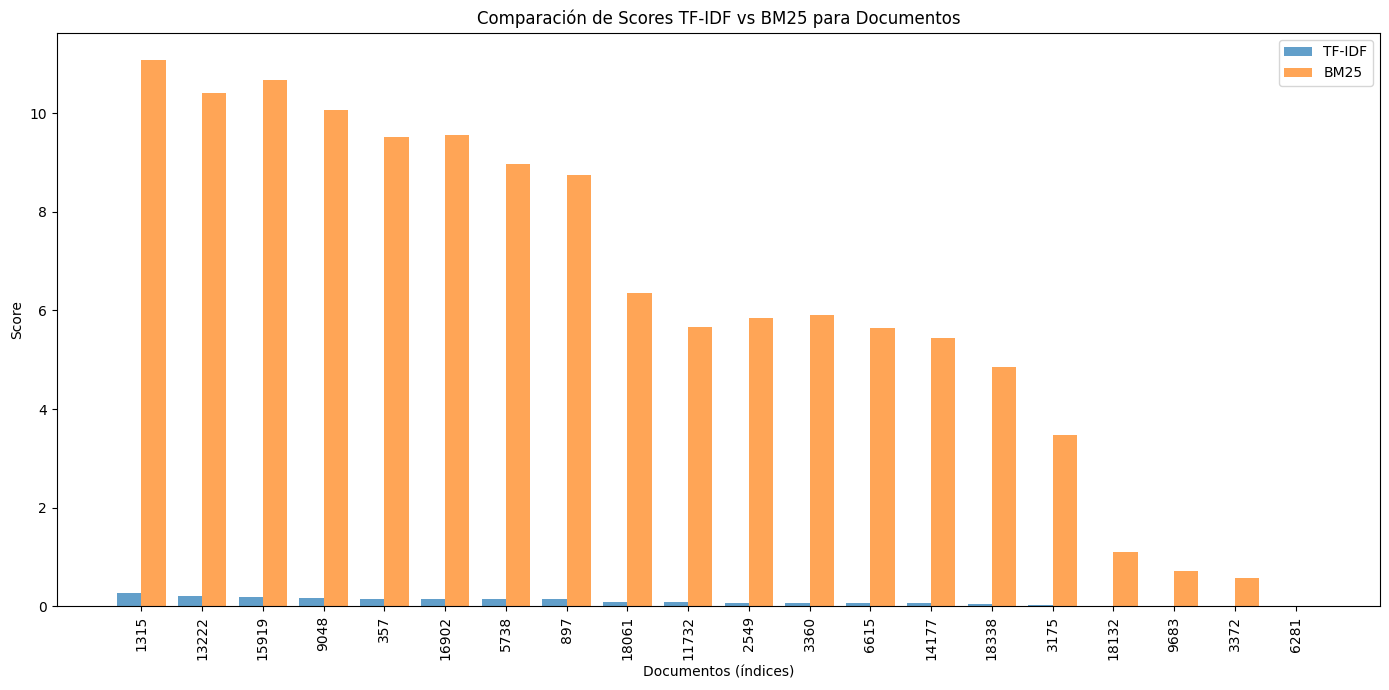

In [17]:
plt.figure(figsize=(14, 7))

bar_width = 0.4
indices = range(len(comparacion_df))

plt.bar(indices, comparacion_df["Score_TFIDF"], width=bar_width, label="TF-IDF", alpha=0.7)
plt.bar([i + bar_width for i in indices], comparacion_df["Score_BM25"], width=bar_width, label="BM25", alpha=0.7)

plt.xlabel("Documentos (índices)")
plt.ylabel("Score")
plt.title("Comparación de Scores TF-IDF vs BM25 para Documentos")
plt.xticks([i + bar_width/2 for i in indices], comparacion_df["Documento"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


**¿Qué documentos obtienen scores más altos en un modelo que en otro?**

En el grafico de barras se observa que tienen mucha diferencia entre TF-IDF y BM25. Siendo que el score es mas alto en BM25 y mucho mas notorio la diferencia de score entre documentos.

**¿A qué se podría deber esta diferencia?**

TF-IDF pondera los términos según su frecuencia en el documento y su rareza en el corpus, por eso puede destacar documentos con términos muy específicos o raros.

BM25 considera además la longitud del documento y la saturación de la frecuencia, por lo que puede favorecer documentos medianamente largos y con buena cobertura de la consulta sin exagerar la frecuencia.

## Parte 5: Evaluación con consulta relevante

### Actividad

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [21]:
consulta = ["chicken"]
relevantes = {1315 ,13222, 5738, 897, 15919}


In [22]:
def precision_at_k(ranking, relevantes, k):
    top_k = ranking[:k]
    relevantes_en_top_k = [doc for doc in top_k if doc in relevantes]
    return len(relevantes_en_top_k) / k

def average_precision(ranking, relevantes):
    ap = 0.0
    relevantes_encontrados = 0
    for i, doc in enumerate(ranking, start=1):
        if doc in relevantes:
            relevantes_encontrados += 1
            ap += relevantes_encontrados / i
    if relevantes_encontrados == 0:
        return 0.0
    return ap / relevantes_encontrados

def mean_average_precision(rankings, relevantes):
    return average_precision(rankings, relevantes)


In [23]:
k = 3

# Rankings (listas de índices ordenados por relevancia)
ranking_tfidf = indices_ordenados
ranking_bm25 = indices_bm25

prec_tfidf = precision_at_k(ranking_tfidf, relevantes, k)
prec_bm25 = precision_at_k(ranking_bm25, relevantes, k)

map_tfidf = average_precision(ranking_tfidf, relevantes)
map_bm25 = average_precision(ranking_bm25, relevantes)

print(f"Precision@{k} TF-IDF: {prec_tfidf:.3f}")
print(f"Precision@{k} BM25: {prec_bm25:.3f}")
print(f"MAP TF-IDF: {map_tfidf:.3f}")
print(f"MAP BM25: {map_bm25:.3f}")


Precision@3 TF-IDF: 1.000
Precision@3 BM25: 1.000
MAP TF-IDF: 0.839
MAP BM25: 0.839


**¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?**

Para este caso donde elegi unos pocos docs considerados relevantes el resultado me indico que ambos modelos dan resultados equivalentes para la consulta y conjunto de documentos relevantes.